In [1]:
import numpy as np
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import cv2

In [2]:
os.getcwd()

'E:\\projects\\ml_projects\\cat vs dog'

In [107]:
#creating seperate directories for cat and dog

In [108]:
def createImageFolders():
    os.chdir('train/')
    path = os.getcwd()
    try:
        os.mkdir(path+'/cat')
        os.mkdir(path+'/dog')
    except:
        print("Directories already exists")
        
    src = path
    cat_dest = path + "/cat" 
    dog_dest = path + "/dog"
    
    files = os.listdir()
    
    for file in files:
        if file[:3]=='cat':
            shutil.move(path+'/'+file,cat_dest)
        else:
            shutil.move(path+'/'+file,dog_dest)
    print("done!") 
    
    

In [60]:
createImageFolders()

Directories already exists
done!


In [3]:
os.listdir(os.getcwd()+'/train')

['cat', 'dog']

In [4]:
os.getcwd()

'E:\\projects\\ml_projects\\cat vs dog'

In [3]:
IMG_SIZE=90
training_data = []

In [4]:
def create_image_training_data():
    xpath = os.getcwd()+'/train'
    categories = os.listdir(xpath)
    for class_index,category in enumerate(categories):
        path = os.path.join(xpath,category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_index])
            except:
                pass
            

In [5]:
create_image_training_data()

In [6]:
len(training_data)

25000

In [7]:
import random
random.seed(1)
random.shuffle(training_data)

In [8]:
X = []
y= []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [42]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X.shape


(25000, 90, 90, 1)

In [18]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [19]:
y = np.array(y)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [21]:
#custom callback
class stop_when_reached(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get('accuracy') >= 0.98:
            print()
            print("Stopping!")
            print()
            self.model.stop_training=True
call_back = stop_when_reached() 

In [22]:
X = X/255.0
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.1,epochs=20,callbacks=[call_back])


Epoch 1/20
704/704 [==============================] - 122s 172ms/step - loss: 0.6595 - accuracy: 0.5928 - val_loss: 0.5138 - val_accuracy: 0.7552
Epoch 2/20
704/704 [==============================] - 119s 168ms/step - loss: 0.4932 - accuracy: 0.7595 - val_loss: 0.4893 - val_accuracy: 0.7600
Epoch 3/20
704/704 [==============================] - 120s 170ms/step - loss: 0.4097 - accuracy: 0.8099 - val_loss: 0.4209 - val_accuracy: 0.8032
Epoch 4/20
704/704 [==============================] - 120s 170ms/step - loss: 0.3316 - accuracy: 0.8535 - val_loss: 0.3443 - val_accuracy: 0.8452
Epoch 5/20
704/704 [==============================] - 130s 184ms/step - loss: 0.2842 - accuracy: 0.8783 - val_loss: 0.3923 - val_accuracy: 0.8384
Epoch 6/20
704/704 [==============================] - 126s 179ms/step - loss: 0.2079 - accuracy: 0.9140 - val_loss: 0.3545 - val_accuracy: 0.8496
Epoch 7/20
704/704 [==============================] - 125s 178ms/step - loss: 0.1391 - accuracy: 0.9469 - val_loss: 0.4995 -

In [24]:
X.shape

(25000, 90, 90, 1)

In [57]:
type(X[1:][0][1][0])

numpy.ndarray

In [23]:
model.save('cat_dog_model.h5')


In [3]:
from tensorflow.keras.models import load_model
new_model = load_model('cat_dog_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 88, 88, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 88, 88, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 128)      

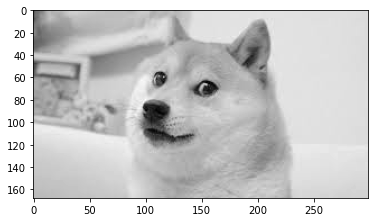

In [4]:
test_image = cv2.imread('testing/dog4.jfif',cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image,cmap='gray')

In [7]:
def predictAnimal(image):
    image = cv2.resize(image,(90,90))
    feed = np.array(image).reshape(-1,90,90,1)
    result = new_model.predict(feed)[0]
    if result > 0.5:
        print("It's a DOG, woof!",result)
    else:
        print("It's a CAT, meow!",result)
    

In [8]:
predictAnimal(test_image)

It's a DOG, woof! [1.]


In [61]:
#testing the accuracy on test images

In [65]:
test_images = os.listdir('test1/')

In [33]:
testing_data=[]

def create_image_testing_data():
    xpath = os.getcwd()+'/test1'
    print(xpath)
    
    for img in os.listdir(xpath):
    
            try:
                img_array = cv2.imread(os.path.join(xpath,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array])
            except:
                pass
        
        
            
create_image_testing_data()

testing_data = np.array(testing_data).reshape(-1,90,90,1)

E:\projects\ml_projects\cat vs dog/test1


In [35]:
pickle.dump(testing_data,open('test_data',"wb"))

In [10]:
import pickle
t = open("test_data","rb")
testing_data = pickle.load(t)

In [11]:
v = new_model.predict(testing_data)

In [12]:
# 0 - cat / 1 -dog

[1.]


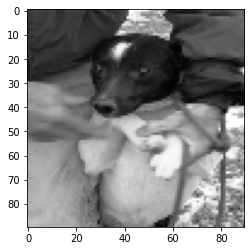

[0.]


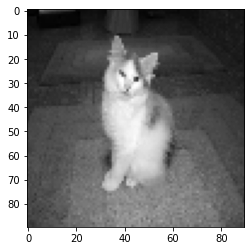

[0.]


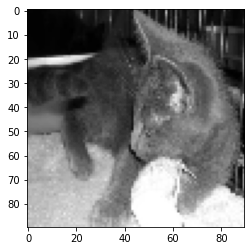

[1.]


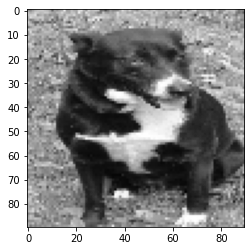

[1.]


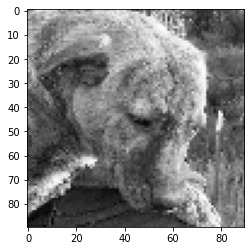

[0.]


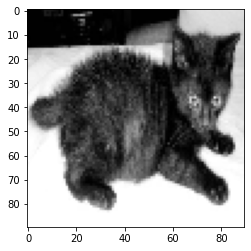

[0.]


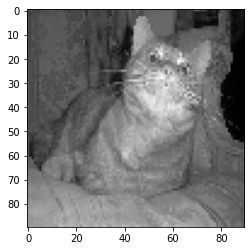

[1.]


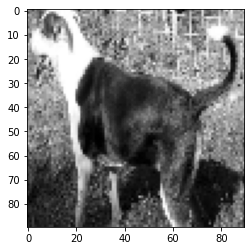

[1.]


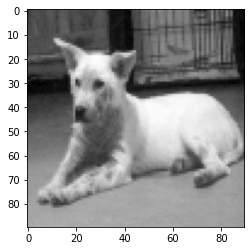

[0.]


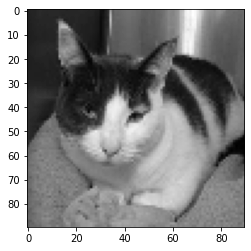

In [13]:
stop=10
for res,img in zip(v,testing_data):
    if stop!=0:
        print(res)
        plt.imshow(img,cmap='gray')
        plt.show()
    else:
        break
    stop-=1